In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


### handing Data Inbalancess

In [2]:
df = pd.read_csv(r'D:\Uni Docs\DSC4996\Dynamic_fraud_detection_system\Data\generated_df.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.146374,-0.015519,0.085356,-0.040542,0.066677,-0.081207,0.087645,-0.117641,-0.073402,-0.057336,...,0.013769,0.002563,0.101975,-0.060232,-0.191511,-0.090968,-0.066698,-0.206421,-0.086421,1
1,-0.179971,0.010620,0.158013,-0.114025,0.077457,-0.087706,0.063625,-0.105901,-0.054817,-0.068706,...,-0.042756,-0.057189,0.073796,-0.024800,-0.230429,-0.011682,0.010791,-0.156533,-0.053275,1
2,1.219835,2.119089,-1.024633,-0.613399,-0.621483,-0.769342,0.432778,-1.214603,0.185715,-0.019076,...,-0.163955,0.156860,0.181343,0.217964,-0.300916,0.709351,-0.015154,-0.055179,-0.325371,0
3,-0.099612,0.048388,0.174961,-0.056897,0.157342,-0.086699,-0.008830,-0.129328,-0.082722,-0.063709,...,-0.048781,0.036051,0.025908,-0.005768,-0.131239,-0.022695,-0.069082,-0.209291,-0.020680,1
4,-0.327164,1.181842,-0.220696,0.650137,-0.166884,-0.770594,-0.379380,-0.480922,0.187963,0.333115,...,-0.057635,-0.225252,0.156492,0.247896,-0.060545,0.908772,-0.067108,-0.005120,-0.344421,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458721,1.360712,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,...,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,-0.349773,0
458722,-0.144409,-0.056656,0.148645,-0.104169,0.046285,-0.127849,-0.003682,-0.101806,-0.062445,-0.060322,...,0.030523,-0.052311,0.109520,-0.045674,-0.214116,-0.088019,-0.053956,-0.185627,-0.087897,1
458723,-0.312295,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,...,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,-0.335356,0
458724,-0.132160,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,...,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,-0.195658,0


In [4]:
df['Class'].value_counts()

0    283253
1    175473
Name: Class, dtype: int64

In [5]:
features = df.drop('Class',axis=1)
target = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=1234)

### Model Traning - 01

#### Logistic Regression Model

In [7]:
lgt = LogisticRegression(max_iter=1000)
lgt.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = lgt.predict(X_test)

In [9]:
accuracy_lgt = accuracy_score(y_test, y_pred)
precision_lgt = precision_score(y_test, y_pred)
recall_lgt = recall_score(y_test, y_pred)
f1_score_lgt = f1_score(y_test, y_pred)
mcc_lgt = matthews_corrcoef(y_test, y_pred)

print("Accuracy:", accuracy_lgt)
print("Precision:", precision_lgt)
print("Recall:", recall_lgt)
print("F1-score:", f1_score_lgt)
print("MCC:", mcc_lgt)

Accuracy: 0.9423735094718025
Precision: 0.9014054170480857
Recall: 0.9537102976783934
F1-score: 0.9268204908162276
MCC: 0.8803085405707608


In [10]:
cm_logit = confusion_matrix(y_test, y_pred)
print(cm_logit)

[[52979  3662]
 [ 1625 33480]]


#### SVM Model

In [11]:
svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [12]:
y_pred_svm = svm.predict(X_test)

In [16]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_score_svm)
print("MCC:", mcc_svm)

Accuracy: 0.9996294116364746
Precision: 0.9997719953259042
Recall: 0.9992593647628543
F1-score: 0.9995156143150218
MCC: 0.999215612259167


In [17]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[56633     8]
 [   26 35079]]


#### Decision Tree

In [18]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred_dtree = dtree.predict(X_test)

In [21]:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_score_dtree = f1_score(y_test, y_pred_dtree)
mcc_dtree = matthews_corrcoef(y_test, y_pred_dtree)

print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1-score:", f1_score_dtree)
print("MCC:", mcc_dtree)

Accuracy: 0.9993678198504568
Precision: 0.9987760794694447
Recall: 0.9995727104401082
F1-score: 0.9991742361684558
MCC: 0.9986623214073909


In [22]:
cm_dt = confusion_matrix(y_test, y_pred_dtree)
print(cm_dt)

[[56598    43]
 [   15 35090]]


### CNN

In [23]:
X_train1 = X_train.to_numpy()
y_train1 = y_train.to_numpy()
X_test1 = X_test.to_numpy()
y_test1 = y_test.to_numpy()

In [24]:
X_train1 = X_train1.reshape(X_train1.shape[0],X_train1.shape[1],1)
X_test1 = X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)
X_train1.shape, X_test1.shape

((366980, 30, 1), (91746, 30, 1))

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [26]:
#import model
model=Sequential()

In [27]:
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train1[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [28]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# fitting the model
cnn_fit =model.fit(X_train1,y_train1,epochs=20,validation_data=(X_test1,y_test1))

Epoch 1/20
11469/11469 [==============================] - 43s 4ms/step - loss: 0.0209 - accuracy: 0.9986 - val_loss: 0.0108 - val_accuracy: 0.9993
Epoch 2/20
11469/11469 [==============================] - 42s 4ms/step - loss: 0.0174 - accuracy: 0.9989 - val_loss: 0.0108 - val_accuracy: 0.9993
Epoch 3/20
11469/11469 [==============================] - 44s 4ms/step - loss: 0.0174 - accuracy: 0.9989 - val_loss: 0.0108 - val_accuracy: 0.9993
Epoch 4/20
11469/11469 [==============================] - 43s 4ms/step - loss: 0.0172 - accuracy: 0.9989 - val_loss: 0.0108 - val_accuracy: 0.9993
Epoch 5/20
11469/11469 [==============================] - 42s 4ms/step - loss: 0.0173 - accuracy: 0.9989 - val_loss: 0.0108 - val_accuracy: 0.9993
Epoch 6/20
11469/11469 [==============================] - 47s 4ms/step - loss: 0.0174 - accuracy: 0.9989 - val_loss: 0.0108 - val_accuracy: 0.9993
Epoch 7/20
11469/11469 [==============================] - 51s 4ms/step - loss: 0.0174 - accuracy: 0.9989 - val_loss: 0

In [30]:
# plot
def plot_learningcurve(cnn_fit,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, cnn_fit.history['accuracy'])
  plt.plot(epoch, cnn_fit.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, cnn_fit.history['loss'])
  plt.plot(epoch, cnn_fit.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

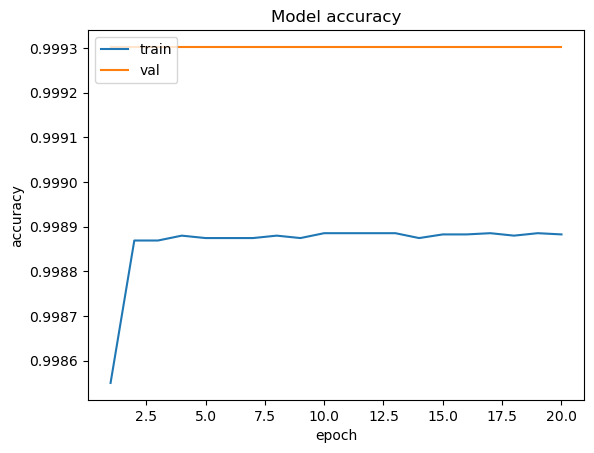

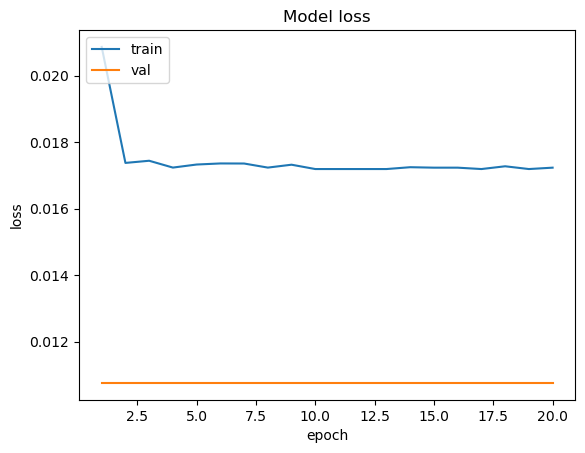

In [31]:
plot_learningcurve(cnn_fit,20)

In [32]:
y_pred_cnn = model.predict(X_test1)

2868/2868 [==============================] - 3s 1ms/step


In [33]:
import numpy as np

def predict_classes(probs, threshold=0.5):

  classes = np.zeros_like(probs, dtype=int)
  classes[probs >= threshold] = 1
  return classes


In [34]:
preds = predict_classes(y_pred_cnn)

In [35]:
accuracy_cnn = accuracy_score(y_test1, preds)
precision_cnn = precision_score(y_test1, preds)
recall_cnn = recall_score(y_test1, preds)
f1_score_cnn = f1_score(y_test1, preds)
mcc_cnn = matthews_corrcoef(y_test1, preds)

print("Accuracy:", accuracy_cnn)
print("Precision:", precision_cnn)
print("F1-score:", f1_score_cnn)
print("Recall:", recall_cnn)
print("MCC:", mcc_cnn)

Accuracy: 0.9993024219039522
Precision: 1.0
F1-score: 0.9990876172554386
Recall: 0.9981768978777952
MCC: 0.9985240644328498


In [36]:
cm_dt = confusion_matrix(y_test1, preds)
print(cm_dt)

[[56641     0]
 [   64 35041]]
